In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nutrition-facts/menu.csv


In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # draw graphs in Jupyter Notebook
from mpl_toolkits.mplot3d import Axes3D # creating a 3D axes.
import matplotlib as mpl  # visualization library in Python for 2D plots of arrays.
import seaborn as sns #beautiful statistics and visualization



In [3]:
menu = pd.read_csv('/kaggle/input/nutrition-facts/menu.csv') # read the csv file

In [4]:
menu.isnull().sum() # check for missing values, return the number of missing values

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [5]:
menu.head() # show us the top rows

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


Text(0.5, 0, 'Values')

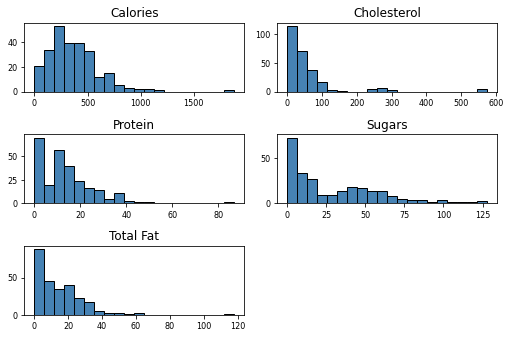

In [6]:


menu.hist(column=['Calories','Cholesterol','Sugars','Protein','Total Fat'],bins=20, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.ylabel("Counter")
plt.xlabel("Values")





So first we'll import some libraries that will help us later to analyze.


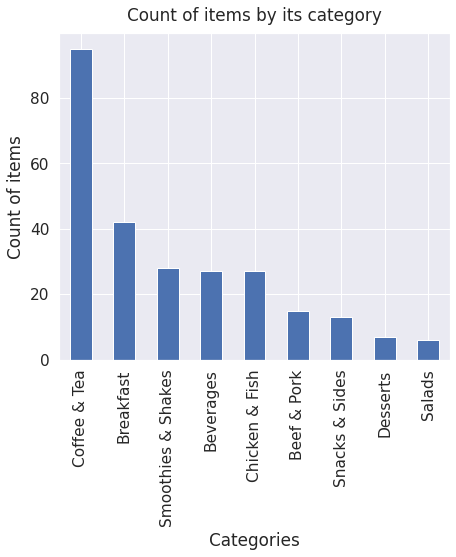

In [7]:
sns.set(font_scale=1.4)
menu['Category'].value_counts().plot(kind='bar', figsize=(7, 6))
plt.xlabel("Categories", labelpad=5)
plt.ylabel("Count of items", labelpad=5)
plt.title("Count of items by its category", y=1.02);



I see that the dishes are divided into categories. Here's a look of the distribution along the categories. we can see that the biggest category is coffe & Tea, and the category with the lowest variety.


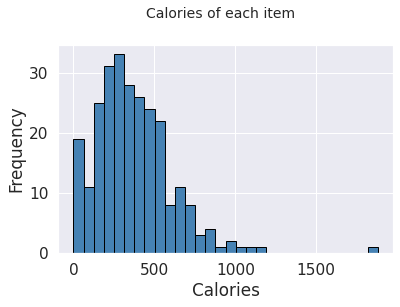

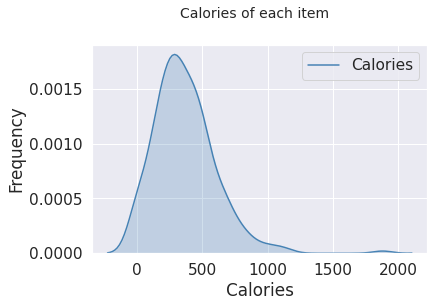

In [8]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Calories of each item", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Calories")
ax.set_ylabel("Frequency")
freq, bins, patches = ax.hist(menu['Calories'], color='steelblue', bins=30,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Calories of each item", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Calories")
ax1.set_ylabel("Frequency")
sns.kdeplot(menu['Calories'], ax=ax1, shade=True, color='steelblue')



We can see that most of the items contain between 250-500 calories. There's also one giant dish that is really exceptional. let's check which one is it.


In [9]:
menu[menu['Calories']==menu['Calories'].max()]['Item']

82    Chicken McNuggets (40 piece)
Name: Item, dtype: object



So we can see that the dish with the biggest calorie values is Chicken McNuggets (40 piece). keep away from it :)


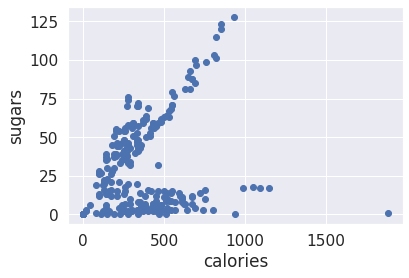

In [10]:
sugars = menu['Sugars']
calories = menu['Calories']
plt.scatter(calories, sugars)
plt.xlabel('calories')
plt.ylabel('sugars')
plt.show()



Here's an interesting scatter plot, which is great to display correlation between two parameters. the x axis shows the calories and the y axis shows the sugars. we can see that there's clear linear correlation between calories and sugars, as long as we have more calories in the dish, it contains more sugars, at most of the dishes. we can see some exceptionals at dishes between 0-750 calories that have maximum 25 grams of sugars.


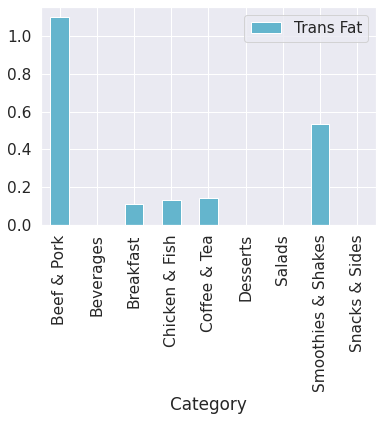

In [11]:
menu.pivot_table('Trans Fat', 'Category').plot(kind='bar', stacked=True, color = 'c')



Well, the dishes with the most Trans Fat are Beef & Pork and Smoothies & Shakes.


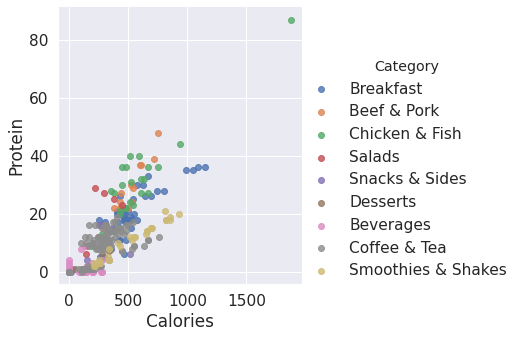

In [12]:


Protein = menu['Protein']
Calories = menu['Calories']
Category = menu['Category']

df = pd.DataFrame(dict(Calories=Calories, Protein=Protein, Category=Category))
sns.lmplot('Calories', 'Protein', data=df, hue='Category', fit_reg=False)
plt.show()



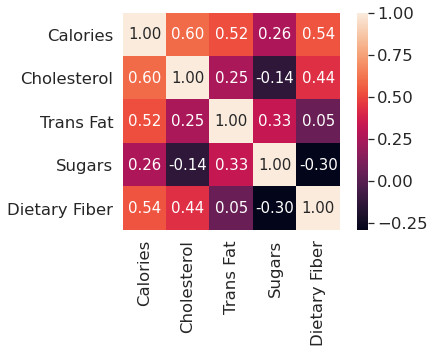

In [13]:
cols = ['Calories','Cholesterol','Trans Fat','Sugars','Dietary Fiber']
cm = np.corrcoef(menu[cols].values.T) # Return Pearson product-moment correlation coefficients on all the columns
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)



correlation matrix between some main values. Calories has positive correlation with Cholesterol and Trans Fat, and Sugars has negative correlation with Dietary Fiber.


In [14]:
def plot(grouped):
    item = grouped["Item"].sum()
    item_list = item.sort_index() # sort the items by sugar values
    item_list = item_list[-20:] # keeps only the 20 first items
    plt.figure(figsize=(9,10))
    graph = sns.barplot(item_list.index,item_list.values) #x is the sugar values, y is the item name
    labels = [aj.get_text()[-40:] for aj in graph.get_yticklabels()] # crop text to make it look better
    graph.set_yticklabels(labels)

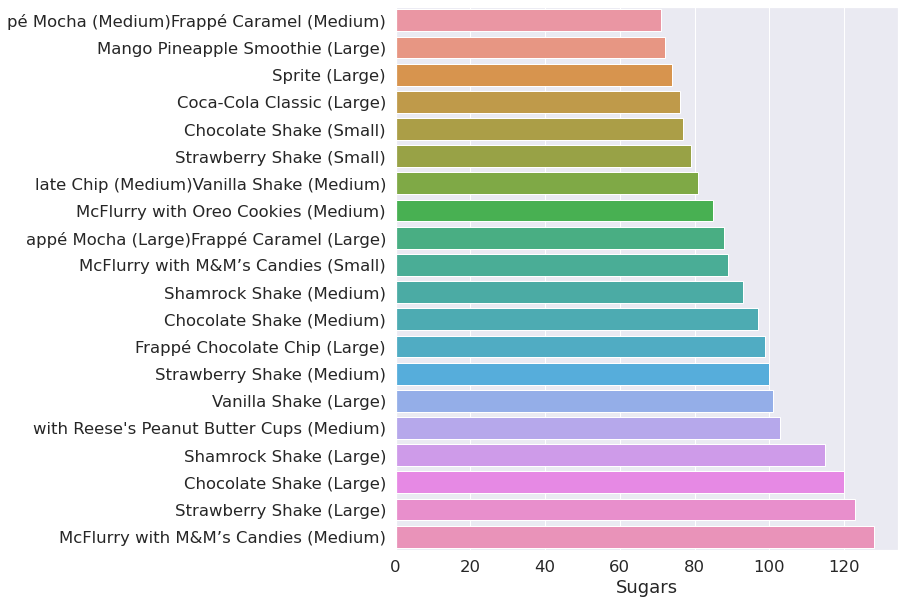

In [15]:
    sugar = menu.groupby(menu["Sugars"]) # group by sugars
    plot(sugar)



TOP 20 items by sugar.


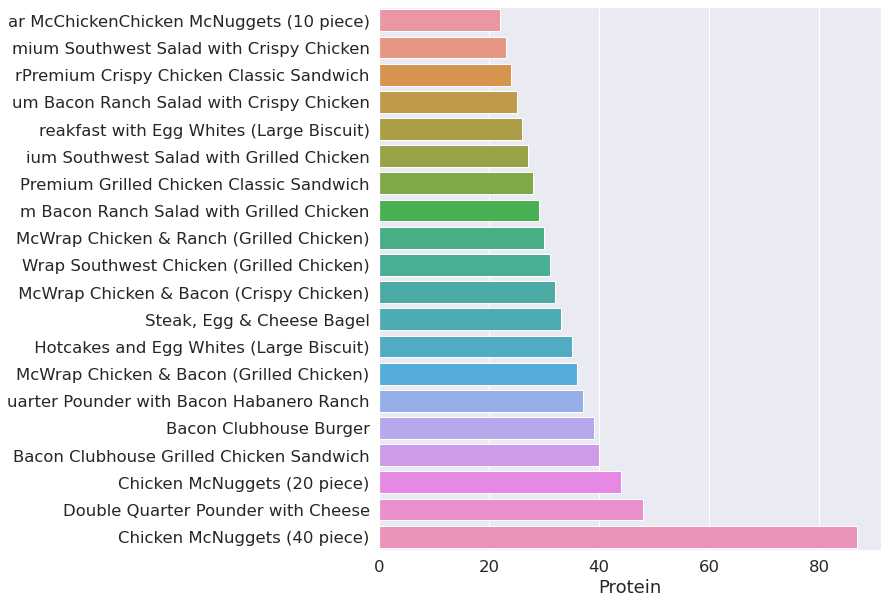

In [16]:
protein = menu.groupby(menu["Protein"])
plot(protein)



Top 20 items by Protein. so 40 Nuggets contains alot of Protein, but what with Cholsetrol and Fat? let's see.


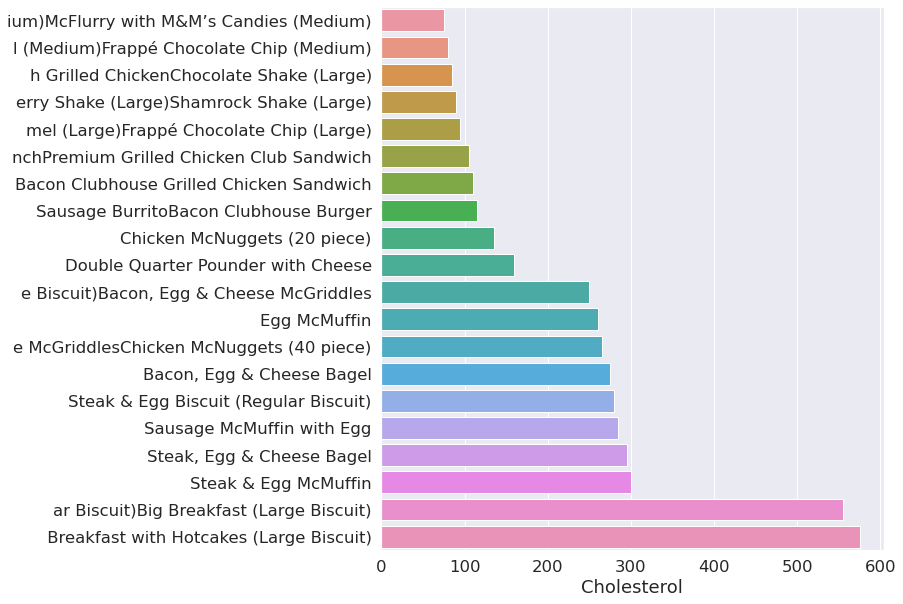

In [17]:
Cholesterol = menu.groupby(menu["Cholesterol"])
plot(Cholesterol)



Top 20 items by cholesterol


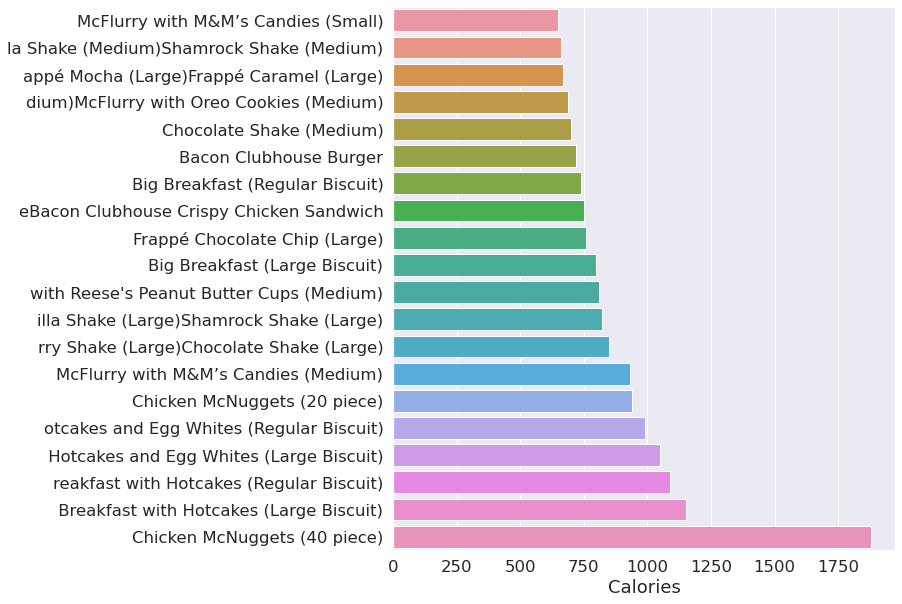

In [18]:
calories = menu.groupby(menu["Calories"])
plot(calories)

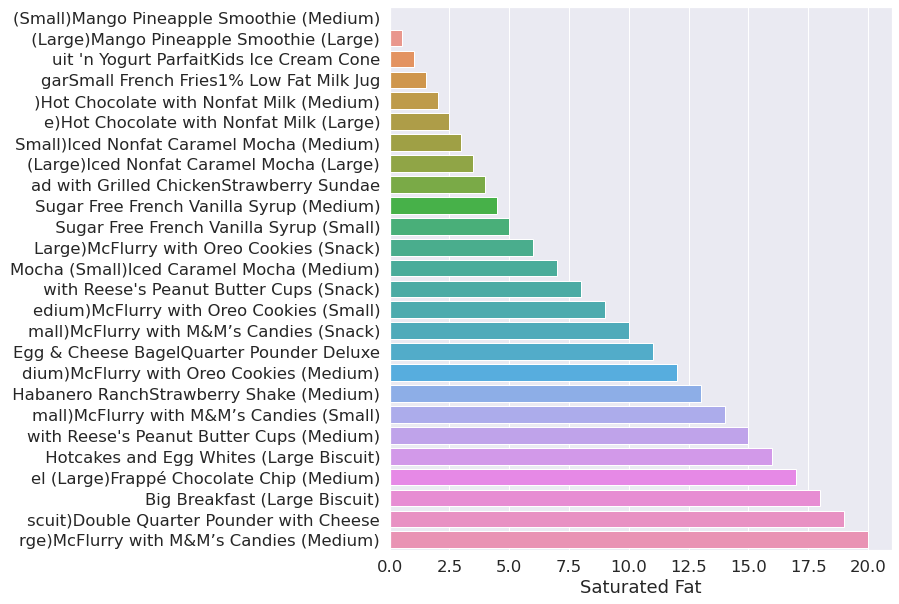

In [19]:
Saturated = menu.groupby(menu["Saturated Fat"])
plot(Saturated)



Top 20 items by calories.


In [20]:
menu.corr()['Calories'].sort_values()

Vitamin C (% Daily Value)       -0.068747
Vitamin A (% Daily Value)        0.108844
Sugars                           0.259598
Calcium (% Daily Value)          0.428426
Trans Fat                        0.522441
Dietary Fiber                    0.538894
Dietary Fiber (% Daily Value)    0.540014
Cholesterol (% Daily Value)      0.595208
Cholesterol                      0.596399
Iron (% Daily Value)             0.643552
Sodium                           0.712309
Sodium (% Daily Value)           0.713415
Carbohydrates (% Daily Value)    0.781242
Carbohydrates                    0.781539
Protein                          0.787847
Saturated Fat                    0.845564
Saturated Fat (% Daily Value)    0.847631
Total Fat (% Daily Value)        0.904123
Total Fat                        0.904409
Calories from Fat                0.904588
Calories                         1.000000
Name: Calories, dtype: float64



The method corr gives us correlation of specific column with all the other columns. in this example, we can see that calories has strong positive correlation with total fat, saturated fat, and carbohtydrates.
